In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [130]:
#Load CSV Files with movie data
imdb_file = pd.read_csv("Resource/IMDb_All_Genres_etf_clean1.csv")
imdb_clean = imdb_file.drop(columns = ["Censor", "main_genre", "side_genre", "Runtime(Mins)"])
imdb_clean = imdb_clean.rename(columns = {"Rating": "imdb_score", "Total_Gross" : "Gross"})
imdb_clean.set_index("Movie_Title")
imdb_clean["Gross"] = imdb_clean["Gross"].replace({"Gross Unkown": ""})
imdb_clean["Gross"] = imdb_clean["Gross"].replace('[\$M,]', '', regex=True)
imdb_clean["Gross"] = pd.to_numeric(imdb_clean["Gross"])
imdb_clean.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55


In [3]:
#Load CSV Files with movie data
top1000_file = pd.read_csv("Resource/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv")
top1000_file = top1000_file.drop(columns = ["Genre", "Movie Rating", "Duration", "Votes", "Logline"])
top1000_file = top1000_file.rename(columns = {"Movie Title": "Movie_Title", "Year of Realease": "Year"})
top1000_file = top1000_file.set_index("Movie_Title")
top1000_file["Year"] = top1000_file["Year"].replace({"X2016": "2016"})
top1000_file["Metascore"] = top1000_file["Metascore"].replace({"******": ""})
top1000_file["Year"] = pd.to_numeric(top1000_file["Year"])
top1000_file["Metascore"] = pd.to_numeric(top1000_file["Metascore"])
top1000_file["Gross"] = top1000_file["Gross"].replace('[\$M,]', '', regex=True)
#top1000_file["Gross"] = top1000_file["Gross"].replace('[M,]', '', regex=True)
top1000_file["Gross"] = top1000_file["Gross"].replace({"******": ""})
top1000_file["Gross"] = pd.to_numeric(top1000_file["Gross"])
top1000_file["Worldwide LT Gross"] = top1000_file["Worldwide LT Gross"].replace('[\$,]', '', regex=True)
top1000_file.dtypes

Year                    int64
Gross                 float64
Worldwide LT Gross     object
Metascore             float64
dtype: object

In [4]:
#Merge Dataframes into one
merge_df = pd.merge(imdb_clean, top1000_file, how = "outer", on = ["Movie_Title", "Year", "Gross"])
merge_df = merge_df.drop(columns = "Worldwide LT Gross")
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN,NaN
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86,84.0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85,94.0
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58,74.0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55,87.0


In [5]:
directorframe = merge_df["Director"].str.split(", ", expand = True, n = 1)
directorframe= directorframe.rename(columns = {directorframe.columns[0]: "Director"})
merge_df["Director"] = directorframe["Director"]
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN,NaN
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86,84.0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85,94.0
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58,74.0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55,87.0


In [6]:
actorframe = merge_df["Actors"].str.split(", ", expand = True, n = 1)
actorframe= actorframe.rename(columns = {actorframe.columns[0]: "Actors"})
merge_df["Actors"] = actorframe["Actors"]
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore
0,Kantara,2022,Rishab Shetty,Rishab Shetty,9.3,NaN,NaN
1,The Dark Knight,2008,Christopher Nolan,Christian Bale,9.0,534.86,84.0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,Elijah Wood,9.0,377.85,94.0
3,Inception,2010,Christopher Nolan,Leonardo DiCaprio,8.8,292.58,74.0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,Elijah Wood,8.8,342.55,87.0


In [7]:
merge_df["Gross"] = pd.to_numeric(merge_df["Gross"])
merge_df["Metascore"] = pd.to_numeric(merge_df["Metascore"])
merge_df.dtypes

Movie_Title     object
Year             int64
Director        object
Actors          object
imdb_score     float64
Gross          float64
Metascore      float64
dtype: object

In [101]:
imdb_frame = merge_df[["Movie_Title", "imdb_score", "Metascore", "Gross"]]
imdb_frame = imdb_frame.dropna()
imdb_frame

,Movie_Title,imdb_score,Metascore,Gross
1,The Dark Knight,9.0,84.0,534.86
2,The Lord of the Rings: The Return of the King,9.0,94.0,377.85
3,Inception,8.8,74.0,292.58
4,The Lord of the Rings: The Two Towers,8.8,87.0,342.55
5,The Lord of the Rings: The Fellowship of the Ring,8.8,92.0,315.54
...,...,...,...,...
5479,Cats & Dogs,5.1,47.0,93.39
5493,Gulliver's Travels,4.9,33.0,42.78
5499,The Flintstones,4.9,38.0,130.51
5506,102 Dalmatians,4.8,35.0,66.96


The r-value for this chart is 0.2831674645808336


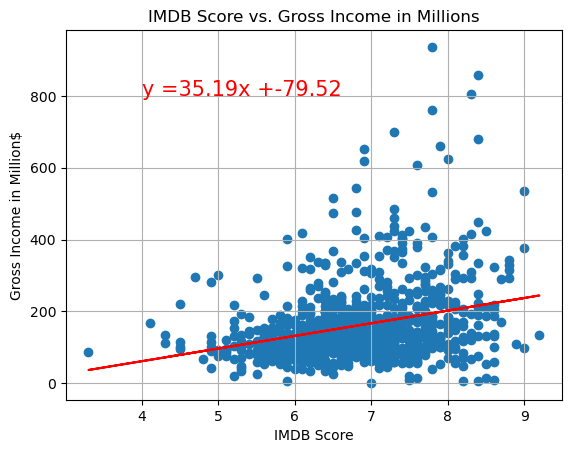

In [110]:
x_values = imdb_frame["imdb_score"]
y_values = imdb_frame["Gross"]
plt.scatter(x_values, y_values)
#plt.ylim(0, 850000000)
#plt.xlim(0,100)
plt.ylabel("Gross Income in Million$")
plt.xlabel("IMDB Score")
imdb_reg = linregress(x_values, y_values)
imdb_line = imdb_reg.slope*x_values+imdb_reg.intercept
show_eq = "y =" + str(round(imdb_reg.slope, 2)) + "x +" + str(round(imdb_reg.intercept,2))
plt.annotate(show_eq, (4,800), color = "red", fontsize = 15)
plt.grid()
plt.plot(x_values, imdb_line, "r")
plt.title("IMDB Score vs. Gross Income in Millions")
print(f"The r-value for this chart is {imdb_reg.rvalue}")
plt.savefig("images/IMDB_Gross")
plt.show()

In [18]:
meta_frame = merge_df[["Movie_Title", "Metascore", "Gross"]]
meta_frame = meta_frame.dropna()
meta_frame

,Movie_Title,Metascore,Gross
1,The Dark Knight,84.0,534.86
2,The Lord of the Rings: The Return of the King,94.0,377.85
3,Inception,74.0,292.58
4,The Lord of the Rings: The Two Towers,87.0,342.55
5,The Lord of the Rings: The Fellowship of the Ring,92.0,315.54
...,...,...,...
5636,Smurfs: The Lost Village,40.0,45.02
5638,The BFG,66.0,55.48
5644,Jaws 2,51.0,102.92
5646,The Jungle Book 2,38.0,47.89


The r-value for this chart is 0.2673613256907771


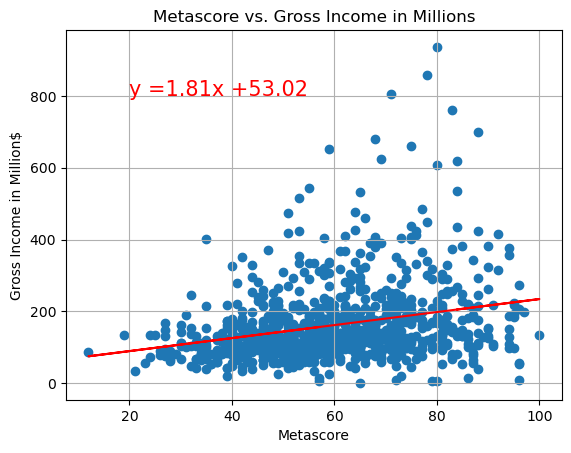

In [111]:
x_values = imdb_frame["Metascore"]
y_values = imdb_frame["Gross"]
plt.scatter(x_values, y_values)
#plt.ylim(0, 850000000)
#plt.xlim(0,100)
plt.ylabel("Gross Income in Million$")
plt.xlabel("Metascore")
meta_reg = linregress(x_values, y_values)
meta_line = meta_reg.slope*x_values+meta_reg.intercept
show_eq = "y =" + str(round(meta_reg.slope, 2)) + "x +" + str(round(meta_reg.intercept,2))
plt.annotate(show_eq, (20,800), color = "red", fontsize = 15)
plt.grid()
plt.plot(x_values, meta_line, "r")
plt.title("Metascore vs. Gross Income in Millions")
print(f"The r-value for this chart is {meta_reg.rvalue}")
plt.savefig("images/Meta_Gross")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

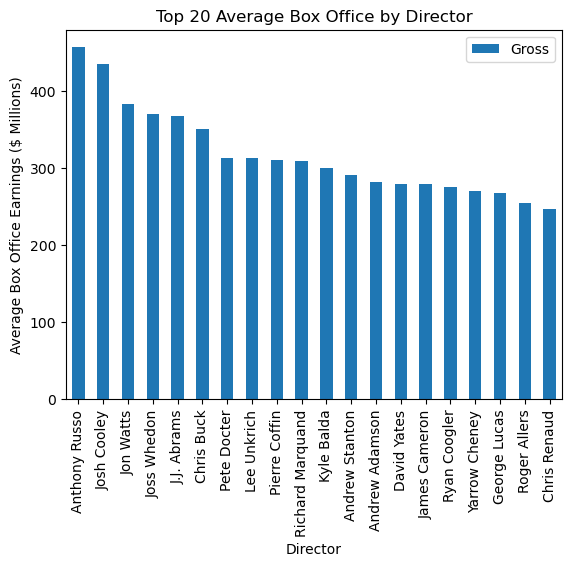

In [112]:
#Find per film average in revenue by director
directors = merge_df[["Director", "Gross"]].replace('Directors:', '', regex=True).dropna()
director_average = directors.groupby(["Director"]).mean().sort_values(["Gross"], ascending = False)
top20_directors = director_average.iloc[:20]
top20_directors
top20_directors.plot(kind = "bar")
plt.ylabel("Average Box Office Earnings ($ Millions)")
plt.title("Top 20 Average Box Office by Director")
plt.savefig("images/Director_Average")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

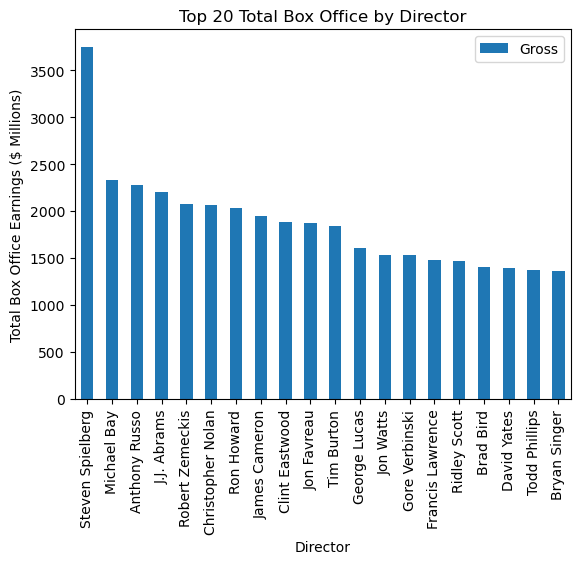

In [113]:
#Find total box office earnings by director
director_total = directors.groupby(["Director"]).sum().sort_values(["Gross"], ascending = False)
top20_dir_totals = director_total.iloc[:20]
top20_dir_totals.plot(kind = "bar")
plt.ylabel("Total Box Office Earnings ($ Millions)")
plt.title("Top 20 Total Box Office by Director")
plt.savefig("images/Director_Total")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

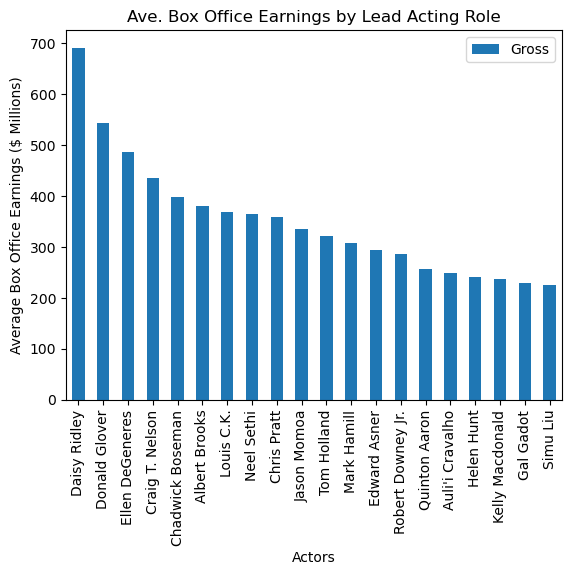

In [115]:
#Find per film average in revenue by actor
actors = merge_df[["Actors", "Gross"]].dropna()
actor_average = actors.groupby(["Actors"]).mean().sort_values(["Gross"], ascending = False)
top20_actors = actor_average.iloc[:20]
top20_actors.plot(kind = "bar")
plt.ylabel("Average Box Office Earnings ($ Millions)")
plt.title("Ave. Box Office Earnings by Lead Acting Role")
plt.savefig("images/Actor_Average")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

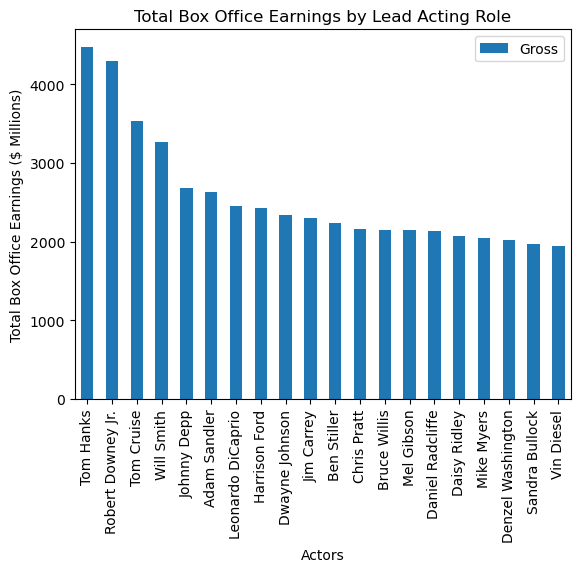

In [114]:
#Find total earnings by lead actor
actor_total = actors.groupby(["Actors"]).sum().sort_values(["Gross"], ascending = False)
top20_act_totals = actor_total.iloc[:20]
top20_act_totals.plot(kind = "bar")
plt.ylabel("Total Box Office Earnings ($ Millions)")
plt.title("Total Box Office Earnings by Lead Acting Role")
plt.savefig("images/Actor_Total")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

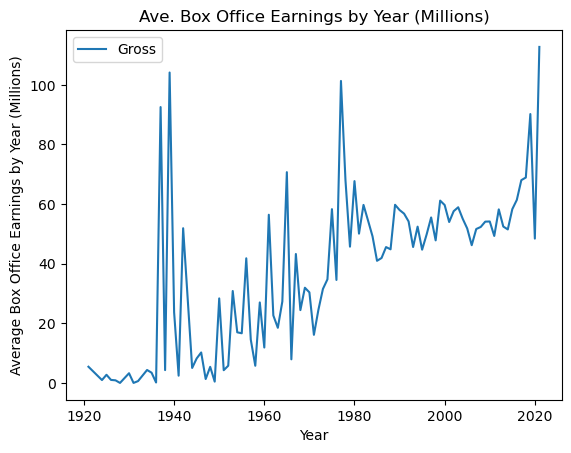

In [118]:
#Comparing box-office earnings to release year
year_gross = merge_df[["Year", "Gross"]].dropna()
year_average = year_gross.groupby(["Year"]).mean().sort_values(["Year"], ascending = False)
year_average.head()
year_average.plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("Average Box Office Earnings by Year (Millions)")
plt.title("Ave. Box Office Earnings by Year (Millions)")
plt.savefig("images/Year_Average")
plt.show

Text(0.5, 0, 'Year')

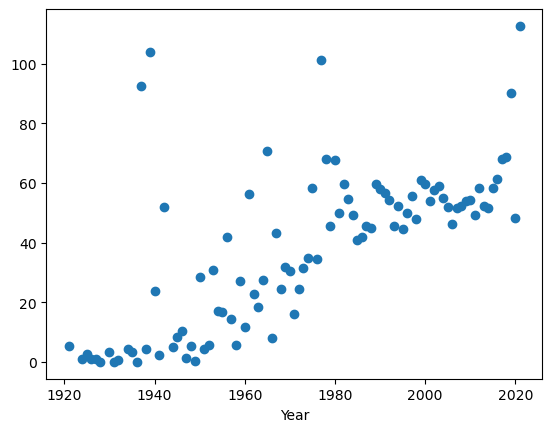

In [78]:
#Comparing box-office earnings to release year
year_gross = merge_df[["Year", "Gross"]].dropna()
year_average = year_gross.groupby(["Year"]).mean().sort_values(["Year"], ascending = False)

year_average.head()
plt.scatter(year_average.index, year_average)
plt.xlabel("Year")

In [59]:
# Total earnings by year
year_total = year_gross.groupby(["Year"]).sum().sort_values(["Gross"], ascending = False)
year_total.head()

,Gross
Year,
2016,10930.24
2018,10406.01
2013,10337.36
2017,10273.30
2015,10087.74


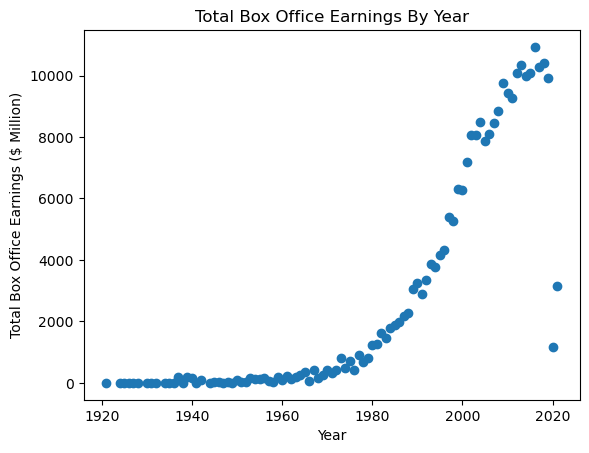

In [121]:
#Comparing box-office earnings to release year
plt.scatter(year_total.index, year_total)
plt.xlabel("Year")
plt.ylabel("Total Box Office Earnings ($ Million)")
plt.title("Total Box Office Earnings By Year")
plt.savefig("images/Year_Total")

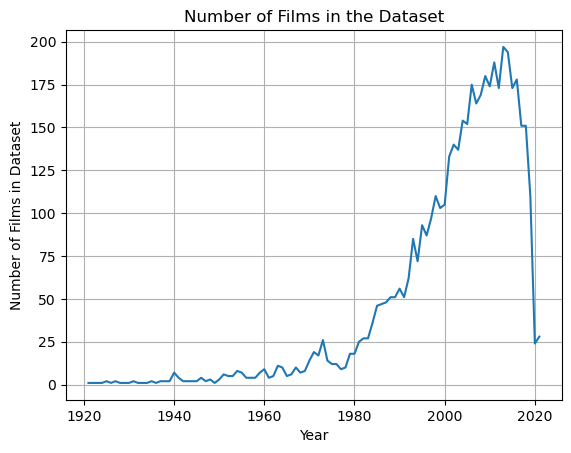

In [129]:
filmcount = year_gross.groupby(["Year"]).size()
filmcount.plot(kind = "line")
plt.grid()
plt.ylabel("Number of Films in Dataset")
plt.title("Number of Films in the Dataset")
plt.show
plt.savefig("images/Film_Count")